In [1]:
import pandas as pd
import numpy as np

In [2]:
class Perceptron():
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=30):
        self.eta = rychlost_ucenia 
        self.n_iter = pocet_iteracii      

    def fit(self, X,y):
        self.vahy = np.zeros(1+ X.shape[1])
        self.errors_=[]

        self.vahy_to_visualize_1=[]
        self.vahy_to_visualize_2=[]
        self.vahy_to_visualize_3=[]
        
        for i in range(self.n_iter):
            errors = 0
            for matica,vystup in zip(X,y):
                update = self.eta * (vystup-self.predikcia(matica))
                self.vahy[1:] += update*matica
                self.vahy[0]+= update
                
                print(self.vahy[1:])
                
                errors += int(update !=0.0)
            self.errors_.append(errors)   
            self.vahy_to_visualize_1.append(self.vahy[0])
            self.vahy_to_visualize_2.append(self.vahy[1])
            self.vahy_to_visualize_3.append(self.vahy[2])
        return self  
    def net_input(self, X):
        return np.dot(X, self.vahy[1:])+ self.vahy[0]

    def predikcia(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
df = pd.read_csv('optical_con.csv')

In [4]:
df

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,64,4,UN,Client-Server,"0,1","0,839546","1,974686","308,491814","700,514102","0,352431",NaN,NaN,NaN,NaN,NaN
1,64,4,UN,Client-Server,"0,2","0,827412","9,556437","291,037663","864,599227","0,506302",NaN,NaN,NaN,NaN,NaN
2,64,4,UN,Client-Server,"0,3","0,802605","27,027618","264,928002","839,372851","0,638516",NaN,NaN,NaN,NaN,NaN
3,64,4,UN,Client-Server,"0,4","0,723403","61,848511","235,776888","1256,053108","0,767051",NaN,NaN,NaN,NaN,NaN
4,64,4,UN,Client-Server,"0,5","0,72121","121,085884","189,680044","1343,875577","0,807812",NaN,NaN,NaN,NaN,NaN
5,64,4,UN,Client-Server,"0,6","0,647035","205,881088","145,988097","1574,366301","0,841771",NaN,NaN,NaN,NaN,NaN
6,64,4,UN,Client-Server,"0,7","0,567402","284,999115","118,323674","1974,853192","0,85033",NaN,NaN,NaN,NaN,NaN
7,64,4,UN,Client-Server,"0,8","0,511627","368,157288","92,003542","1845,521914","0,865625",NaN,NaN,NaN,NaN,NaN
8,64,4,UN,Client-Server,"0,9","0,47056","431,169037","80,43286","2605,196106","0,888828",NaN,NaN,NaN,NaN,NaN
9,64,4,UN,Client-Server,1,"0,421877","505,119598","68,518468","2586,130982","0,882552",NaN,NaN,NaN,NaN,NaN


In [5]:
#Výber potrebných dát na ďalšie spracovanie
df1=df[df["Spatial Distribution"]=="UN"]
df1

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,64,4,UN,Client-Server,"0,1","0,839546","1,974686","308,491814","700,514102","0,352431",NaN,NaN,NaN,NaN,NaN
1,64,4,UN,Client-Server,"0,2","0,827412","9,556437","291,037663","864,599227","0,506302",NaN,NaN,NaN,NaN,NaN
2,64,4,UN,Client-Server,"0,3","0,802605","27,027618","264,928002","839,372851","0,638516",NaN,NaN,NaN,NaN,NaN
3,64,4,UN,Client-Server,"0,4","0,723403","61,848511","235,776888","1256,053108","0,767051",NaN,NaN,NaN,NaN,NaN
4,64,4,UN,Client-Server,"0,5","0,72121","121,085884","189,680044","1343,875577","0,807812",NaN,NaN,NaN,NaN,NaN
5,64,4,UN,Client-Server,"0,6","0,647035","205,881088","145,988097","1574,366301","0,841771",NaN,NaN,NaN,NaN,NaN
6,64,4,UN,Client-Server,"0,7","0,567402","284,999115","118,323674","1974,853192","0,85033",NaN,NaN,NaN,NaN,NaN
7,64,4,UN,Client-Server,"0,8","0,511627","368,157288","92,003542","1845,521914","0,865625",NaN,NaN,NaN,NaN,NaN
8,64,4,UN,Client-Server,"0,9","0,47056","431,169037","80,43286","2605,196106","0,888828",NaN,NaN,NaN,NaN,NaN
9,64,4,UN,Client-Server,1,"0,421877","505,119598","68,518468","2586,130982","0,882552",NaN,NaN,NaN,NaN,NaN


In [6]:
ocistene =df1[['Spatial Distribution','Processor Utilization','Channel Utilization','Input Waiting Time','Channel Waiting Time']]
ocistene

,Spatial Distribution,Processor Utilization,Channel Utilization,Input Waiting Time,Channel Waiting Time
0,UN,"0,839546","0,352431","308,491814","1,974686"
1,UN,"0,827412","0,506302","291,037663","9,556437"
2,UN,"0,802605","0,638516","264,928002","27,027618"
3,UN,"0,723403","0,767051","235,776888","61,848511"
4,UN,"0,72121","0,807812","189,680044","121,085884"
5,UN,"0,647035","0,841771","145,988097","205,881088"
6,UN,"0,567402","0,85033","118,323674","284,999115"
7,UN,"0,511627","0,865625","92,003542","368,157288"
8,UN,"0,47056","0,888828","80,43286","431,169037"
9,UN,"0,421877","0,882552","68,518468","505,119598"


In [7]:
df2=df[df["Spatial Distribution"]=="HR"]
df2

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
40,64,4,HR,Client-Server,"0,1","0,549508","1,222985","327,044772","1327,334659","0,297951",NaN,NaN,NaN,NaN,NaN
41,64,4,HR,Client-Server,"0,2","0,509507","5,670937","328,113813","1501,504698","0,357118",NaN,NaN,NaN,NaN,NaN
42,64,4,HR,Client-Server,"0,3","0,531845","16,238094","303,152729","1517,024022","0,479036",NaN,NaN,NaN,NaN,NaN
43,64,4,HR,Client-Server,"0,4","0,519655","45,07972","279,317307","1455,789406","0,543299",NaN,NaN,NaN,NaN,NaN
44,64,4,HR,Client-Server,"0,5","0,515341","129,721649","198,615324","1881,893315","0,636632",NaN,NaN,NaN,NaN,NaN
45,64,4,HR,Client-Server,"0,6","0,452565","262,34314","117,981682","2090,345171","0,649635",NaN,NaN,NaN,NaN,NaN
46,64,4,HR,Client-Server,"0,7","0,381618","347,487946","96,904514","2511,787943","0,633707",NaN,NaN,NaN,NaN,NaN
47,64,4,HR,Client-Server,"0,8","0,355369","424,036957","72,491967","3071,20543","0,672917",NaN,NaN,NaN,NaN,NaN
48,64,4,HR,Client-Server,"0,9","0,32818","495,345062","64,535954","3621,956835","0,681484",NaN,NaN,NaN,NaN,NaN
49,64,4,HR,Client-Server,1,"0,282082","575,525146","51,514464","3681,474413","0,655035",NaN,NaN,NaN,NaN,NaN


In [8]:
ocistene2 =df2[['Spatial Distribution','Processor Utilization','Channel Utilization','Input Waiting Time','Channel Waiting Time']]
ocistene2

,Spatial Distribution,Processor Utilization,Channel Utilization,Input Waiting Time,Channel Waiting Time
40,HR,"0,549508","0,297951","327,044772","1,222985"
41,HR,"0,509507","0,357118","328,113813","5,670937"
42,HR,"0,531845","0,479036","303,152729","16,238094"
43,HR,"0,519655","0,543299","279,317307","45,07972"
44,HR,"0,515341","0,636632","198,615324","129,721649"
45,HR,"0,452565","0,649635","117,981682","262,34314"
46,HR,"0,381618","0,633707","96,904514","347,487946"
47,HR,"0,355369","0,672917","72,491967","424,036957"
48,HR,"0,32818","0,681484","64,535954","495,345062"
49,HR,"0,282082","0,655035","51,514464","575,525146"


In [9]:
df3=df[df["Spatial Distribution"]=="PS"]
df3

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
120,64,4,PS,Client-Server,"0,1","0,828573","1,934532","281,991851","0,52921","607,869882",NaN,NaN,NaN,NaN,NaN
121,64,4,PS,Client-Server,"0,2","0,824084","9,5502","262,127869","0,633802","902,966929",NaN,NaN,NaN,NaN,NaN
122,64,4,PS,Client-Server,"0,3","0,795685","26,33913","239,734762","0,718047","1042,409722",NaN,NaN,NaN,NaN,NaN
123,64,4,PS,Client-Server,"0,4","0,739597","56,360073","230,163026","0,778299","1219,612435",NaN,NaN,NaN,NaN,NaN
124,64,4,PS,Client-Server,"0,5","0,695053","126,209816","176,588953","0,822266","1202,936709",NaN,NaN,NaN,NaN,NaN
125,64,4,PS,Client-Server,"0,6","0,62477","203,292633","142,07526","0,846927","1688,953232",NaN,NaN,NaN,NaN,NaN
126,64,4,PS,Client-Server,"0,7","0,541929","287,763733","121,877978","0,84079","1904,053095",NaN,NaN,NaN,NaN,NaN
127,64,4,PS,Client-Server,"0,8","0,487871","351,338531","107,055717","0,857222","2191,738331",NaN,NaN,NaN,NaN,NaN
128,64,4,PS,Client-Server,"0,9","0,43976","420,470581","95,21403","0,86","2752,001151",NaN,NaN,NaN,NaN,NaN
129,64,4,PS,Client-Server,1,"0,400416","500,004944","77,396653","0,865191","2895,323131",NaN,NaN,NaN,NaN,NaN


In [10]:
ocistene3 =df3[['Spatial Distribution','Processor Utilization','Channel Utilization','Input Waiting Time','Channel Waiting Time']]
ocistene3

,Spatial Distribution,Processor Utilization,Channel Utilization,Input Waiting Time,Channel Waiting Time
120,PS,"0,828573","607,869882","281,991851","1,934532"
121,PS,"0,824084","902,966929","262,127869","9,5502"
122,PS,"0,795685","1042,409722","239,734762","26,33913"
123,PS,"0,739597","1219,612435","230,163026","56,360073"
124,PS,"0,695053","1202,936709","176,588953","126,209816"
125,PS,"0,62477","1688,953232","142,07526","203,292633"
126,PS,"0,541929","1904,053095","121,877978","287,763733"
127,PS,"0,487871","2191,738331","107,055717","351,338531"
128,PS,"0,43976","2752,001151","95,21403","420,470581"
129,PS,"0,400416","2895,323131","77,396653","500,004944"


In [11]:
#ocistene.to_excel('ocistene1.xlsx', sheet_name='sheet1', index=False)
#ocistene2.to_excel('ocistene2.xlsx', sheet_name='sheet1', index=False)
#ocistene3.to_excel('ocistene3.xlsx', sheet_name='sheet1', index=False)

In [12]:
#súbory spojené manuálne
#načítanie výsledného očisteného súboru s dátami
df5 = pd.read_csv('lukas_final.txt', header=None)
df5

,0,1,2,3,4
0,UN,0.839546,0.352431,308.491814,1.974686
1,UN,0.827412,0.506302,291.037663,9.556437
2,UN,0.802605,0.638516,264.928002,27.027618
3,UN,0.723403,0.767051,235.776888,61.848511
4,UN,0.721210,0.807812,189.680044,121.085884
5,UN,0.647035,0.841771,145.988097,205.881088
6,UN,0.567402,0.850330,118.323674,284.999115
7,UN,0.511627,0.865625,92.003542,368.157288
8,UN,0.470560,0.888828,80.432860,431.169037
9,UN,0.421877,0.882552,68.518468,505.119598


In [13]:
X = df5.iloc[0:469, [1,2]].values
y = df5.iloc[0:469, 0].values

y = np.where(y == 'UN', -1, 1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [14]:
moj_perceptron = Perceptron()
moj_perceptron.fit(X,y)

[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092

[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00

[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138

[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214  0.00387356]
[-0.00721214

[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129 

[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366

[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.00767242  0.0131256 ]
[-0.00767242  0.0131256 ]
[-0.00767242  0.0131256 ]
[-0.00767242  0.0131256 ]
[-0.00767242  0.0131256 ]
[-0.00767242  0.0131256 ]
[-0.00767242  0.0131256 ]
[-0.00767242  0.0131256 ]
[-0.00767242  0.0131256 ]
[-0.00767242  0.0131256 ]
[-0.00767242

[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576 -0.00741858]
[-0.04699576

[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958 -0.01994064]
[-0.04978958

[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928

[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572 -0.0074813 ]
[-0.04843572

[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556 -0.00152228]
[-0.03744556

[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632 -0.00261188]
[-0.04324632

[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0080763]
[-0.0300956  0.0

[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526  0.0069301 ]
[-0.03656526

[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.07197952 -0.0225896 ]
[-0.06098936 -0.01663058]
[-0.06098936 -0.01663058]
[-0.05035246 -0.00704986]
[-0.05035246 -0.00704986]
[-0.05035246 -0.00704986]
[-0.05035246 -0.00704986]
[-0.05035246 -0.00704986]
[-0.05035246 -0.00704986]
[-0.05035246 -0.00704986]
[-0.05035246 -0.00704986]
[-0.05035246 -0.00704986]
[-0.05035246 -0.00704986]
[-0.05035246

[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944 -0.00626168]
[-0.03576944

[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644 -0.00495648]
[-0.04117644

[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714 -0.0181822 ]
[-0.08143714

[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.08582662 -0.02454338]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646 -0.01858436]
[-0.07483646

[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602 -0.0293493 ]
[-0.08971602

[-0.06689736 -0.01097222]
[-0.08368828 -0.01802084]
[-0.08368828 -0.01802084]
[-0.08368828 -0.01802084]
[-0.08368828 -0.01802084]
[-0.08368828 -0.01802084]
[-0.08368828 -0.01802084]
[-0.08368828 -0.01802084]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082 -0.03533334]
[-0.09392082

[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.05429808 -0.00022848]
[-0.071089  -0.0072771]
[-0.08763724 -0.01740314]
[-0.08763724 -0.01740314]
[-0.08763724 -0.01740314]
[-0.08763724 -0.01740314]
[-0.08763724 -0.01740314]
[-0.08763724 -0.01740314]
[-0.09786978 -0.03471564]
[-0.09786978 -0.03471564]
[-0.09786978 -0.03471564]
[-0.09786978 -0.03471564]
[-0.09786978 -0.03471564]
[-0.09786978 -0.03471564]
[-0.09786978 -0.03471564]
[-0.09786978 -0.03471564]
[-0.09786978 -0.03471564]
[-0.09786978 -0.03471564]
[-0.09786978 -0.03471564]
[-0.09786978 -

[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068 -0.01275888]
[-0.06140068

[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222 -0.00880994]
[-0.06832222

[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188 -0.00995614]
[-0.07479188

[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013  -0.01309648]
[-0.0818013 

[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.0989501  -0.03119268]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658 -0.02022654]
[-0.08595658

[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154 -0.03870572]
[-0.11103154

[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]
[-0.06829116 -0.0045889 ]


In [15]:
import matplotlib.pyplot as plt

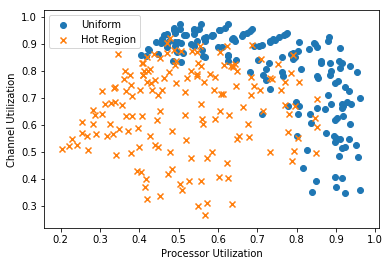

In [16]:
plt.scatter(X[0:160,0],X[0:160,1], marker='o', label='Uniform')
plt.scatter(X[160:320,0],X[160:320,1], marker='x', label='Hot Region')
plt.xlabel('Processor Utilization')
plt.ylabel('Channel Utilization')
plt.legend()

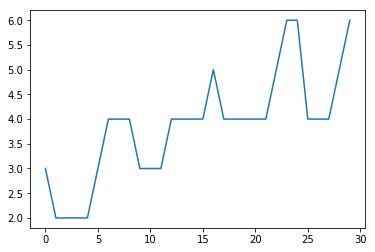

In [17]:
plt.plot(moj_perceptron.errors_)

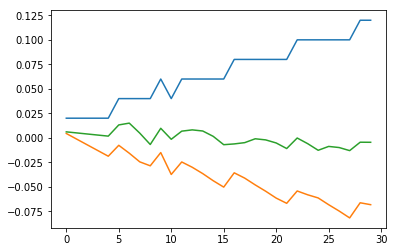

In [18]:
plt.plot(moj_perceptron.vahy_to_visualize_1)
plt.plot(moj_perceptron.vahy_to_visualize_2)
plt.plot(moj_perceptron.vahy_to_visualize_3)

In [19]:
X = df5.iloc[0:469, [1,2]].values
y = df5.iloc[0:469, 0].values

y = np.where(y == 'PS', -1, 1)
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [20]:
moj_perceptron_PS = Perceptron()
moj_perceptron_PS.fit(X,y)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00779168]
[0.01478144 0.00

[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00545732]
[0.01301464 0.00

[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00312296]
[0.01124784 0.00

[0.00948104 0.0007886 ]
[0.00948104 0.0007886 ]
[0.00948104 0.0007886 ]
[0.00948104 0.0007886 ]
[0.00948104 0.0007886 ]
[0.00948104 0.0007886 ]
[0.00948104 0.0007886 ]
[0.00948104 0.0007886 ]
[0.00948104 0.0007886 ]
[0.00948104 0.0007886 ]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00907668 -0.00859438]
[-0.00

[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424 -0.00154576]
[ 0.00771424

[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028 -0.0132631 ]
[-0.01261028

[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[ 0.00418064 -0.00621448]
[-0.01437708 -0.01559746]
[-0.01437708 -0.01559746]
[-0.01437708 -0.01559746]
[-0.01437708 -0.01559746]
[-0.01437708 -0.01559746]
[-0.01437708 -0.01559746]
[-0.01437708

[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384 -0.00854884]
[ 0.00241384

[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704 -0.0108832 ]
[ 0.00064704

[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976 -0.01321756]
[-0.00111976

[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656 -0.01555192]
[-0.00288656

[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00078976]
[0.01072496 0.00

[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342 -0.01704206]
[-0.02796342

[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725  -0.00999344]
[-0.0111725 

[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00312776]
[0.00413762 0.00

[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.03271358 -0.0181521 ]
[-0.01592266 -0.01110348]
[-0.01592266 -0.01110348]
[-0.01592266 -0.01110348]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546   0.00423754]
[-0.0014546 

[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0059937]
[-0.0009733 -0.0

[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.0027401  -0.00832806]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782 -0.01771104]
[-0.02129782

[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.0045069  -0.01066242]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462 -0.0200454 ]
[-0.02306462

[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.02483142 -0.02237976]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405  -0.01533114]
[-0.0080405 

[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822 -0.02471412]
[-0.02659822

[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502 -0.02704848]
[-0.02836502

[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.0115741  -0.01999986]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182 -0.02938284]
[-0.03013182

[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409  -0.02233422]
[-0.0133409 

[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077  -0.02466858]
[-0.0151077 

[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745  -0.02700294]
[-0.0168745 

[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222 -0.03638592]
[-0.03543222

[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.00400572 -0.01112272]
[-0.02256344 -0.0205057 ]
[-0.04085692 -0.03240258]
[-0.04085692

[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908 -0.0098984 ]
[-0.00698908

[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244 -0.00867408]
[-0.00997244

[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]
[-0.04682364 -0.02995394]


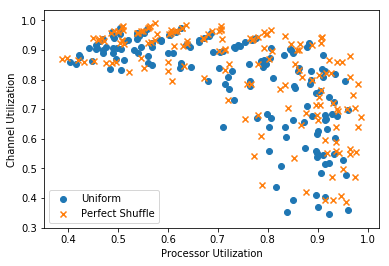

In [21]:
plt.scatter(X[0:160,0],X[0:160,1], marker='o', label='Uniform')
plt.scatter(X[320:469,0],X[320:469,1], marker='x', label='Perfect Shuffle')

plt.xlabel('Processor Utilization')
plt.ylabel('Channel Utilization')
plt.legend()

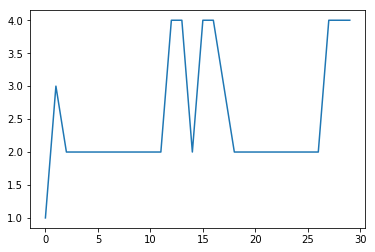

In [22]:
plt.plot(moj_perceptron_PS.errors_)

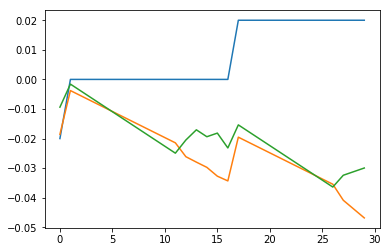

In [23]:
plt.plot(moj_perceptron_PS.vahy_to_visualize_1)
plt.plot(moj_perceptron_PS.vahy_to_visualize_2)
plt.plot(moj_perceptron_PS.vahy_to_visualize_3)

In [24]:
X = df5.iloc[0:469, [1,2]].values
y = df5.iloc[0:469, 0].values

y = np.where(y == 'HR', -1, 1)
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1

In [25]:
moj_perceptron_HR = Perceptron()
moj_perceptron_HR.fit(X,y)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[0.00756756 0.00342396]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-0.0034226  -0.00253506]
[-

[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00684792]
[0.01513512 0.00

[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01027188]
[0.02270268 0.01

[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01369584]
[0.03027024 0.01

[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01933804]
[0.03847474 0.01

[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.0037983 ]
[0.01684768 0.00

[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00722226]
[0.02441524 0.00

[0.0319828  0.01064622]
[0.0319828  0.01064622]
[0.0319828  0.01064622]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.0200292 ]
[0.05054052 0.02

[0.03955036 0.01407018]
[0.03955036 0.01407018]
[0.03955036 0.01407018]
[0.03955036 0.01407018]
[0.03955036 0.01407018]
[0.03955036 0.01407018]
[0.03955036 0.01407018]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0010944]
[ 0.0241229 -0.0

[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00938634]
[0.03299708 0.00

[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.03856088 0.02042802]
[0.0571186 0.029811 ]
[0.0571186 0.029811 ]
[0.0571186 0.029811 ]
[0.0571186 0.029811 ]
[0.0571186 0.029811 ]
[0.0571186 0.029811 ]
[0.0571186 0.029811 ]
[0.0571186 0.029811 ]
[0.0571186 0.029811 ]
[0.0571186 0.029811 ]
[0.0571186 0.029811 ]
[0.0571186 0.0

[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02385198]
[0.04612844 0.02

[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03990094]
[0.06958248 0.03

[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04851118]
[0.07396006 0.04

[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03951708]
[0.06969912 0.03

[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02678444]
[0.0593923  0.02

[0.06755692 0.02530144]
[0.06755692 0.02530144]
[0.06755692 0.02530144]
[0.06755692 0.02530144]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03468442]
[0.08611464 0.03

[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.05844654 0.01116412]
[0.07700426 0.0205471 ]
[0.07700426 0.0205471 ]
[0.07700426 0.0205471 ]
[0.07700426 0.0205471 ]
[0.09306866 0.03792992]
[0.09306866 0.03792992]
[0.09306866 0.03792992]
[0.09306866 0.03792992]
[0.09306866 0.03

[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785 0.0319709]
[0.0820785

[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03099626]
[0.0724464  0.03

[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04066882]
[0.07739272 0.04

[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03731916]
[0.08564362 0.03

[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04670214]
[0.10420134 0.04

[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04885456]
[0.10981038 0.04

[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05189884]
[0.11505996 0.05

[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05707612]
[0.11992032 0.05

[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06640146]
[0.12415064 0.06

[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06324158]
[0.12556662 0.06

[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.09983234 0.03534436]
[0.11839006 0.04472734]
[0.11839006 0.04472734]
[0.11839006 0.04472734]
[0.11839006 0.04472734]
[0.11839006 0.04472734]
[0.11839006 0.04472734]
[0.13114628 0.06313394]
[0.13114628 0.06313394]
[0.13114628 0.06313394]
[0.13114628 0.06313394]
[0.13114628 0.06313394]
[0.13114628 0.06313394]
[0.13114628 0.06313394]
[0.13114628 0.06313394]
[0.13114628 0.06313394]
[0.13114628 0.06

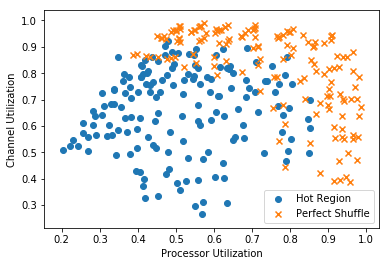

In [26]:
plt.scatter(X[160:320,0],X[160:320,1], marker='o', label='Hot Region')
plt.scatter(X[320:469,0],X[320:469,1], marker='x', label='Perfect Shuffle')

plt.xlabel('Processor Utilization')
plt.ylabel('Channel Utilization')
plt.legend()

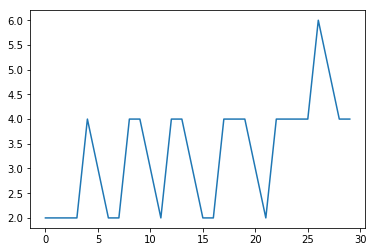

In [27]:
plt.plot(moj_perceptron_HR.errors_)

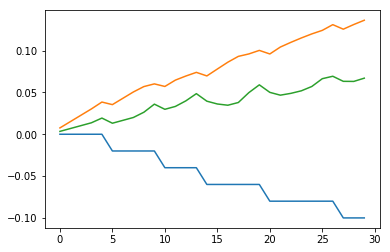

In [28]:
plt.plot(moj_perceptron_HR.vahy_to_visualize_1)
plt.plot(moj_perceptron_HR.vahy_to_visualize_2)
plt.plot(moj_perceptron_HR.vahy_to_visualize_3)

In [29]:
X = df5.iloc[0:479, [3,4]].values
y = df5.iloc[0:479, 0].values

y = np.where(y == 'UN', -1, 1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [30]:
moj_perceptron_UNWT = Perceptron()
moj_perceptron_UNWT.fit(X,y)

[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628 -0.03949372]
[-6.16983628

[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916 -0.01503402]
[ 0.37105916

[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832 -0.03006804]
[ 0.74211832

[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748 -0.04510206]
[ 1.11317748

[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664 -0.06013608]
[ 1.48423664

[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0751701]
[ 1.8552958 -0.0

[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048 -0.11466382]
[-4.31454048

[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412 -0.10523814]
[ 2.59741412

[-3.57242216 -0.14473186]
[-3.57242216 -0.14473186]
[-3.57242216 -0.14473186]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328 -0.12027216]
[ 2.96847328

[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244 -0.13530618]
[ 3.33953244

[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1503402]
[ 3.7105916 -0.1

[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468 -0.18983392]
[-2.45924468

[ 4.08165076 -0.16537422]
[ 4.08165076 -0.16537422]
[ 4.08165076 -0.16537422]
[ 4.08165076 -0.16537422]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552 -0.20486794]
[-2.08818552

[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992 -0.18040824]
[ 4.45270992

[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908 -0.19544226]
[ 4.82376908

[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824 -0.21047628]
[ 5.19482824

[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2255103]
[ 5.5658874 -0.2

[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572 -0.25557834]
[ 6.30800572

[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.7851217 ]
[3.21794526 4.78

[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694  0.11488332]
[-5.11334694

[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778  0.0998493 ]
[-4.74228778

[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10927498]
[2.16966682 0.10

[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946  0.06978126]
[-4.00016946

[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07920694]
[2.91178514 0.07

[-3.25805114  0.03971322]
[-3.25805114  0.03971322]
[-3.25805114  0.03971322]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443  0.06417292]
[3.2828443

[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198  0.0246792 ]
[-2.88699198

[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03410488]
[4.02496262 0.03

[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145  -0.02042286]
[-1.7738145 

[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401  -0.01099718]
[ 5.1381401 

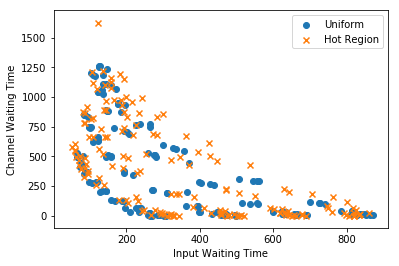

In [31]:
plt.scatter(X[0:160,0],X[0:160,1], marker='o', label='Uniform')
plt.scatter(X[160:320,0],X[160:320,1], marker='x', label='Hot Region')
plt.xlabel('Input Waiting Time')
plt.ylabel('Channel Waiting Time')
plt.legend()

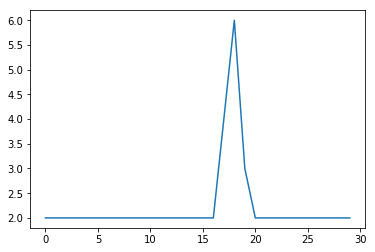

In [32]:
plt.plot(moj_perceptron_UNWT.errors_)

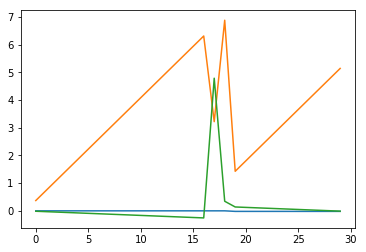

In [33]:
plt.plot(moj_perceptron_UNWT.vahy_to_visualize_1)
plt.plot(moj_perceptron_UNWT.vahy_to_visualize_2)
plt.plot(moj_perceptron_UNWT.vahy_to_visualize_3)

In [34]:
X = df5.iloc[0:479, [3,4]].values
y = df5.iloc[0:479, 0].values

y = np.where(y == 'PS', -1, 1)
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [35]:
moj_perceptron_PSWT = Perceptron()
moj_perceptron_PSWT.fit(X,y)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338  0.14034606]
[-6.69821338

[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[5.29237616 0.37096852]
[-4.0520253   0.32583032]
[-4.0520253   0.32583032]
[-4.0520253   0.32583032]
[-4.0520253   0.32583032]
[-4.0520253   0.32583032]
[-4.0520253   0.32583032]
[-4.0520253   0.32583032]
[-4.0520253   0.32583032]
[-4.0520253   0.32583032]
[-4.0520253   0.325830

[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36532404]
[2.11781098 0.36

[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.5508083 ]
[4.76399906 0.55

[ -7.0815239  -22.21392462]
[ -7.0815239  -22.21392462]
[ -7.0815239  -22.21392462]
[ -7.0815239  -22.21392462]
[ -7.0815239  -22.21392462]
[ -0.91168762 -22.1744309 ]
[  4.90906564 -21.98330216]
[  4.90906564 -21.98330216]
[  9.6246034  -20.74633194]
[ 13.41820428 -18.32461426]
[ 16.33796622 -14.2069925 ]
[18.7044397 -8.5070102]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14386444]
[20.54451054 -1.14

[-6.12777808 -2.10512568]
[-6.12777808 -2.10512568]
[-6.12777808 -2.10512568]
[-6.12777808 -2.10512568]
[-6.12777808 -2.10512568]
[-6.12777808 -2.10512568]
[-6.12777808 -2.10512568]
[-6.12777808 -2.10512568]
[-6.12777808 -2.10512568]
[ 0.0420582  -2.06563196]
[ 5.86281146 -1.87450322]
[ 5.86281146 -1.87450322]
[ 5.86281146 -1.87450322]
[ 5.86281146 -1.87450322]
[ 5.86281146 -1.87450322]
[ 5.86281146 -1.87450322]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.7028823  5.48864254]
[7.70288

[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14127532]
[-10.40527708 -12.14

[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388  3.22880256]
[14.85428388

[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.5897278 ]
[7.01090242 0.58

[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593  -0.40848398]
[15.5159593 

[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46382686]
[4.8200854  9.46

[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52519458]
[5.73220778 1.52

[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994 -3.26262296]
[-8.65742994

[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676  3.2851227 ]
[14.61701676

[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-8.13671618 -3.70219628]
[-1.9668799  -3.66270256]
[ 3.85387336 -3.47157382]
[ 3.85387336 -3.47157382]
[ 3.85387336 -3.47157382]
[ 3.85387336 -3.47157382]
[6.7736353  0.64604794]
[6.7736353  0.64604794]
[6.7736353  0.64604794]
[6.7736353  0.64604794]
[6.7736353  0.64604794]
[6.7736353  0.64604794]
[6.7736353  0.64604794]
[6.7736353  0.64604794]
[6.7736353  0.64604794]
[6.7

[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218 -0.35216384]
[15.27869218

[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.520147  ]
[4.58281828 9.52

[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58151472]
[5.49494066 1.58

[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-8.89469706 -3.20630282]
[-2.72486078 -3.1668091 ]
[ 3.09589248 -2.97568036]
[ 3.09589248 -2.97568036]
[ 3.09589248 -2.97568036]
[ 3.09589248 -2.97568036]
[6.01565442 1.1419414 ]
[6.01565442 1.1419414 ]
[6.01565442 1.1419414 ]
[6.01565442 1.1419414 ]
[6.01565442 1.1419414 ]
[6.01565442 1.1419414 ]
[6.01565442 1.1419414 ]
[6.01565442 1.1419414 ]
[6.01565442 1.1419414 ]
[6.01565442 1.1419414 ]
[6.015

[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79166482]
[ -6.16427356 -10.79

[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-8.3739833  -3.64587614]
[-2.20414702 -3.60638242]
[ 3.61660624 -3.41525368]
[ 3.61660624 -3.41525368]
[ 3.61660624 -3.41525368]
[ 3.61660624 -3.41525368]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.53636818 0.70236808]
[6.5

[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506 -0.2958437 ]
[15.04142506

[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[-3.19465448 -0.56541854]
[ 2.9751818  -0.52592482]
[ 2.9751818  -0.52592482]
[ 2.9751818  -0.52592482]
[ 2.9751818  -0.52592482]
[ 2.9751818  -0.52592482]
[ 2.9751818  -0.52592482]
[ 2.9751818  -0.52592482]
[ 2.9751818  -0.52592482]
[ 2.9751818  -0.52592482]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.57646714]
[4.34555116 9.576467

[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25096172]
[-14.95123798  -3.25

[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876  3.8373363 ]
[13.62176876

[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73534468]
[ -6.40154068 -10.73

[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75868822]
[6.29910106 0.75

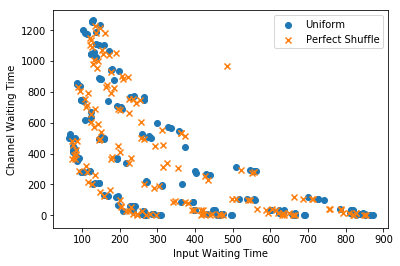

In [36]:
plt.scatter(X[0:160,0],X[0:160,1], marker='o', label='Uniform')
plt.scatter(X[320:479,0],X[320:479,1], marker='x', label='Perfect Shuffle')
plt.xlabel('Input Waiting Time')
plt.ylabel('Channel Waiting Time')
plt.legend()

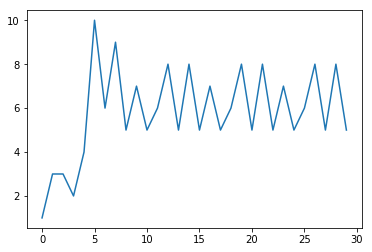

In [37]:
plt.plot(moj_perceptron_PSWT.errors_)

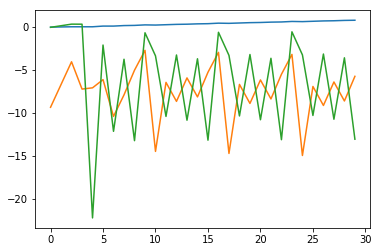

In [38]:
plt.plot(moj_perceptron_PSWT.vahy_to_visualize_1)
plt.plot(moj_perceptron_PSWT.vahy_to_visualize_2)
plt.plot(moj_perceptron_PSWT.vahy_to_visualize_3)

In [39]:
X = df5.iloc[0:479, [3,4]].values
y = df5.iloc[0:479, 0].values

y = np.where(y == 'HR', -1, 1)
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1

In [40]:
moj_perceptron_HRWT = Perceptron()
moj_perceptron_HRWT.fit(X,y)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.0206785 ]
[2.80350602 0.02

[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.041357  ]
[5.60701204 0.04

[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364 -0.07584294]
[-4.69265364

[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762 -0.05516444]
[-1.88914762

[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786 -0.14790468]
[-5.64791786

[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[-2.84441184 -0.12722618]
[ 6.49998962 -0.08208798]
[ 6.49998962 -0.08208798]
[ 6.49998962 -0.08208798]
[ 6.49998962 -0.08208798]
[ 6.49998962 -0.08208798]
[ 6.49998962 -0.08208798]
[ 6.49998962 -0.08208798]
[ 6.49998962

[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582 -0.10654768]
[-0.04090582

[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 9.30349564 -0.06140948]
[ 2.7626002  -0.08586918]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606 -0.19928792]
[-3.79967606

[ 5.5447254  -0.15414972]
[ 5.5447254  -0.15414972]
[ 5.5447254  -0.15414972]
[ 5.5447254  -0.15414972]
[ 5.5447254  -0.15414972]
[ 5.5447254  -0.15414972]
[ 5.5447254  -0.15414972]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004 -0.17860942]
[-0.99617004

[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142 -0.13347122]
[ 8.34823142

[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118 -0.22621146]
[ 4.58946118

[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[-1.95143426 -0.25067116]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672  -0.20553296]
[ 7.3929672 

[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[-5.7102045 -0.3434114]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.2982732 ]
[ 3.63419696 -0.

[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848 -0.3227329 ]
[-2.90669848

[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298 -0.2775947 ]
[ 6.43770298

[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627  -0.39479464]
[-3.8619627 

[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668 -0.37411614]
[-1.05845668

[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478 -0.32897794]
[ 8.28594478

[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-16.1331983   -0.17525276]
[-6.78879684 -0.1301

[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142   0.06986238]
[-4.4380142 

[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818  0.09054088]
[-1.63450818

[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04293884]
[3.95112304 0.04

[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06361734]
[6.75462906 0.06

[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882 -0.0291229 ]
[ 2.99585882

[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484 -0.0084444 ]
[ 5.79936484

[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.0122341 ]
[8.60287086 0.01

[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084 -0.12564434]
[-4.50030084

[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664 -0.05982764]
[ 7.64760664

[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506 -0.19770608]
[-5.45556506

[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904 -0.17702758]
[-2.65205904

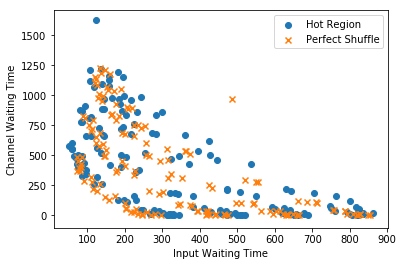

In [41]:
plt.scatter(X[160:320,0],X[160:320,1], marker='o', label='Hot Region')
plt.scatter(X[320:479,0],X[320:479,1], marker='x', label='Perfect Shuffle')
plt.xlabel('Input Waiting Time')
plt.ylabel('Channel Waiting Time')
plt.legend()

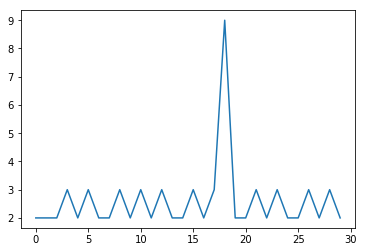

In [42]:
plt.plot(moj_perceptron_HRWT.errors_)

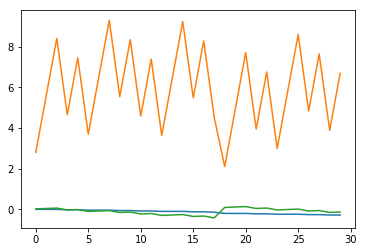

In [43]:
plt.plot(moj_perceptron_HRWT.vahy_to_visualize_1)
plt.plot(moj_perceptron_HRWT.vahy_to_visualize_2)
plt.plot(moj_perceptron_HRWT.vahy_to_visualize_3)

In [44]:
df_final=df5.replace({ "UN": "1", "HR": "2", "PS": "3"})
df_final


,0,1,2,3,4
0,1,0.839546,0.352431,308.491814,1.974686
1,1,0.827412,0.506302,291.037663,9.556437
2,1,0.802605,0.638516,264.928002,27.027618
3,1,0.723403,0.767051,235.776888,61.848511
4,1,0.721210,0.807812,189.680044,121.085884
5,1,0.647035,0.841771,145.988097,205.881088
6,1,0.567402,0.850330,118.323674,284.999115
7,1,0.511627,0.865625,92.003542,368.157288
8,1,0.470560,0.888828,80.432860,431.169037
9,1,0.421877,0.882552,68.518468,505.119598


In [45]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [46]:
COLUMN_NAMES=[
    '0',
    '1',
    '2',
    '3',
    '4'
]

In [47]:
testing_dataset=df_final
print(type(testing_dataset))
print(testing_dataset)

<class 'pandas.core.frame.DataFrame'>
     0         1         2           3            4
0    1  0.839546  0.352431  308.491814     1.974686
1    1  0.827412  0.506302  291.037663     9.556437
2    1  0.802605  0.638516  264.928002    27.027618
3    1  0.723403  0.767051  235.776888    61.848511
4    1  0.721210  0.807812  189.680044   121.085884
5    1  0.647035  0.841771  145.988097   205.881088
6    1  0.567402  0.850330  118.323674   284.999115
7    1  0.511627  0.865625   92.003542   368.157288
8    1  0.470560  0.888828   80.432860   431.169037
9    1  0.421877  0.882552   68.518468   505.119598
10   1  0.901173  0.370026  495.533336     2.153823
11   1  0.897863  0.536910  469.872618    11.002777
12   1  0.871957  0.657370  447.158333    31.924433
13   1  0.853846  0.772778  395.848075    84.117371
14   1  0.796428  0.852561  311.877373   194.432526
15   1  0.731779  0.910729  217.600589   341.365112
16   1  0.640211  0.916259  157.213968   495.164948
17   1  0.568923  0.924583

In [169]:
from sklearn.neural_network import MLPClassifier
X = testing_dataset.iloc[:,0:4].values
y = testing_dataset.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.70)


In [170]:
viacvrstvovy_perceptron = MLPClassifier(activation='logistic',solver='adam',alpha = 0.01,hidden_layer_sizes=(5,2),max_iter=1000)
print(viacvrstvovy_perceptron.fit(X,y))

MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [171]:
print("\nPresnosť siete: %.2f%%"%(viacvrstvovy_perceptron.score(X_test,y_test)*100))


Presnosť siete: 32.83%


In [172]:
model = Sequential()
model.add(Dense(128,input_dim=4, activation='relu'))
model.add(Dense(256,input_dim=128, activation='relu'))
model.add(Dense(64, input_dim=256, activation='sigmoid'))
model.add(Dense(1))

In [173]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.fit(X_test,y_test)
scores=model.evaluate(X_test, y_test)
history = model.fit(X_test, y_test, epochs=100, batch_size=10,verbose=1)

Epoch 1/1
329/329 [==============================] - 0s 398us/step
Epoch 1/100
329/329 [==============================] - 0s 873us/step - loss: 0.7031 - accuracy: 0.3495
Epoch 2/100
329/329 [==============================] - 0s 488us/step - loss: 0.6937 - accuracy: 0.3495
Epoch 3/100
329/329 [==============================] - 0s 378us/step - loss: 0.6819 - accuracy: 0.3435
Epoch 4/100
329/329 [==============================] - 0s 368us/step - loss: 0.6690 - accuracy: 0.3465
Epoch 5/100
329/329 [==============================] - 0s 475us/step - loss: 0.6849 - accuracy: 0.3465
Epoch 6/100
329/329 [==============================] - 0s 468us/step - loss: 0.6879 - accuracy: 0.3465
Epoch 7/100
329/329 [==============================] - 0s 337us/step - loss: 0.6851 - accuracy: 0.3465
Epoch 8/100
329/329 [==============================] - 0s 314us/step - loss: 0.6774 - accuracy: 0.3465
Epoch 9/100
329/329 [==============================] - 0s 396us/step - loss: 0.6776 - accuracy: 0.3435
Epoch 

329/329 [==============================] - 0s 334us/step - loss: 0.6742 - accuracy: 0.3465
Epoch 79/100
329/329 [==============================] - 0s 316us/step - loss: 0.6673 - accuracy: 0.3465
Epoch 80/100
329/329 [==============================] - 0s 337us/step - loss: 0.6813 - accuracy: 0.3465
Epoch 81/100
329/329 [==============================] - 0s 306us/step - loss: 0.6984 - accuracy: 0.3465
Epoch 82/100
329/329 [==============================] - 0s 322us/step - loss: 0.7239 - accuracy: 0.3465
Epoch 83/100
329/329 [==============================] - 0s 401us/step - loss: 0.6994 - accuracy: 0.3465
Epoch 84/100
329/329 [==============================] - 0s 417us/step - loss: 0.6773 - accuracy: 0.3465
Epoch 85/100
329/329 [==============================] - 0s 414us/step - loss: 0.6759 - accuracy: 0.3465
Epoch 86/100
329/329 [==============================] - 0s 362us/step - loss: 0.6844 - accuracy: 0.3465
Epoch 87/100
329/329 [==============================] - 0s 349us/step - loss:

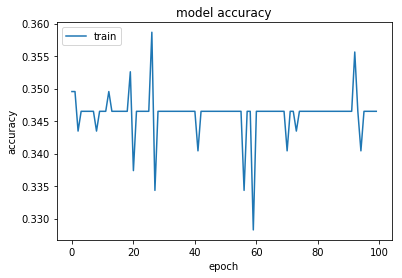

In [174]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

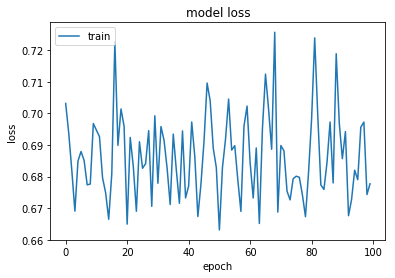

In [175]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()